# Import Packages

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# data preprocessing
from sklearn import preprocessing

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns

# model fit
import statsmodels.api as sm
import tensorflow as tf

# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')

#Word2Vec Model
!pip install gensim==4.0.0
#import gensim
from gensim.models import Word2Vec

# #Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score,roc_auc_score,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#nltk
#import nltk
#from nltk.stem import WordNetLemmatizer
#from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 29.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


# Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
# Access shared folder 
file = '/content/drive/My Drive/bitcoin_price_prediction/tweets_cleaned.csv' #Make sure you create a shortcut of this file from the SHARED folder on your personal drive
df = pd.read_csv(file) #Cleaned Twitter data
df_two = df.copy(deep=True)

In [4]:
# file = '/content/drive/My Drive/tweets_cleaned.csv' #Make sure you create a shortcut of this file from the SHARED folder on your personal drive
# df = pd.read_csv(file) #Cleaned Twitter data
#df_two = df.copy(deep=True)

In [5]:
df[30:60]

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_length,tweet_yyyymmdd,clean_tweet,cleaned_tweet
30,38,CappyTrades🍀,NaN,Calling out tickers that you should probably l...,2020-10-08 23:24:36,99.0,89.0,1568.0,False,2021-02-10 23:35:27,holy smokes! $mara #btc #bitcoin https://t.co/...,btc bitcoin,Twitter Web App,False,56,2021-02-10,"['holy', 'smoke', 'btc', 'bitcoin']",holy smoke btc bitcoin
31,40,#Mailey,"Vancouver, BC",Lucky fool making decisions and money based on...,2020-11-03 19:10:23,314.0,182.0,8639.0,False,2021-02-10 23:34:58,free #mailey advice:\n\nimagine in 2019 there ...,mailey bitcoin btc,Twitter Web App,False,140,2021-02-10,"['free', 'mailey', 'advice', 'imagine', 'bitco...",free mailey advice imagine bitcoin mine compan...
32,41,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:34:33,"price analysis 2/10: #btc, #eth, #ada, #xrp, #...",btc eth ada xrp dot bnb ltc ...,Twitter Web App,False,135,2021-02-10,"['price', 'analysis', 'btc', 'eth', 'ada', 'xr...",price analysis btc eth ada xrp dot bnb ltc lin...
33,42,The Third Coast,NaN,Straightforward technical analysis for equitie...,2020-05-14 22:20:54,202.0,28.0,659.0,False,2021-02-10 23:34:25,rally got a little ahead of itself for #bitcoi...,bitcoin tesla,Twitter Web App,False,140,2021-02-10,"['rally', 'get', 'little', 'ahead', 'bitcoin',...",rally get little ahead bitcoin tweet tesla new...
34,43,Mike Sharkey,NaN,#Cryptocurrency Investor. @Penn_State Alum. #T...,2009-05-17 15:00:52,896.0,2437.0,5001.0,False,2021-02-10 23:34:04,$tel everyone... #cgash marketing may begin to...,cgash telcoin kucoin,Twitter for iPhone,False,140,2021-02-10,"['everyone', 'cgash', 'market', 'may', 'begin'...",everyone cgash market may begin tomorrow buy t...
35,46,Nishant Bhardwaj,"Kota, Rajasthan","Philosopher, psychologist, spiritual, writer a...",2010-07-01 06:59:21,662.0,155.0,915.0,False,2021-02-10 23:33:00,$cvc. that’s the tweet. 🚀 \n\n#bitcoin #btc #d...,bitcoin btc dogecoin,Twitter for iPhone,False,75,2021-02-10,"['tweet', 'bitcoin', 'btc', 'dogecoin']",tweet bitcoin btc dogecoin
36,47,Tonya Barris,NaN,NaN,2020-12-29 16:55:33,0.0,16.0,2.0,False,2021-02-10 23:32:35,who want to learn about forex trading and join...,forex forexsignals trading forextrade...,Twitter for iPhone,False,140,2021-02-10,"['want', 'learn', 'forex', 'trade', 'join', 'g...",want learn forex trade join great team forex f...
37,48,WSB Crypto Mod 🚀🚀🚀,NaN,If #Wallstreetbets can take on Banks & Hedge F...,2018-01-23 21:49:55,4309.0,941.0,4839.0,False,2021-02-10 23:32:14,institutions are buying #bitcoin \n\nover $10...,bitcoin,Twitter for iPhone,False,139,2021-02-10,"['institution', 'buy', 'bitcoin', 'million', '...",institution buy bitcoin million worth get move...
38,49,Langer Dan Returns,Wouldn't You like to know.,A victim of radical social media censorship.,2020-11-04 11:26:40,31.0,26.0,1207.0,False,2021-02-10 23:32:12,me while i'm hodling #bitcoin #btc https://t.c...,bitcoin btc,Twitter Web App,False,58,2021-02-10,"[""'"", 'hodling', 'bitcoin', 'btc']",' hodling bitcoin btc
39,50,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:31:40,#crypto prices | 6:30 pm | 2/10/21 https://t.c...,crypto bitcoin btc ethereum eth ...,Twitter Web App,False,131,2021-02-10,"['crypto', 'price', 'pm', 'bitcoin', 'btc', 'e...",crypto price pm bitcoin btc ethereum eth tethe...


In [6]:
#Converting the "clean_tweet" column supported by embeddings.
tweets = []

for i in df['clean_tweet']:
  tweets.append(eval(i))

# Word2Vec Model

In [7]:
#word2vec model
w2v_model = Word2Vec(min_count=4,
                     window=5,
                     #sample=1e-5, 
                     alpha=0.05, 
                     min_alpha=0.0007, 
                     negative=20,
                     seed=10)


#building vocab of the word2vec model from the custom data
w2v_model.build_vocab(tweets, progress_per=100000)

In [8]:
#training the word2vec model - this takes ~20 minutes to run
w2v_model.train(tweets, total_examples=w2v_model.corpus_count, epochs=8, report_delay=1)

(298103591, 353588144)

In [9]:
# checking similar words to battery in the corpus
w2v_model.wv.most_similar(positive=["bullish"])
print('\n')
w2v_model.wv.most_similar(positive=["bull"])
print('\n')
w2v_model.wv.most_similar(positive=["rocket"])
print('\n')
w2v_model.wv.most_similar(negative=["bearish"])
print('\n')
w2v_model.wv.most_similar(negative=["bear"])
print('\n')
w2v_model.wv.most_similar(negative=["overbought"])


[('bearish', 0.8327456116676331),
 ('bulish', 0.6425039172172546),
 ('osma', 0.6368057131767273),
 ('intact', 0.6130334734916687),
 ('reversal', 0.6089345216751099),
 ('cautious', 0.6086883544921875),
 ('downtrend', 0.6059187650680542),
 ('overextend', 0.6055377721786499),
 ('invalidate', 0.592048704624176),
 ('ao', 0.5866380929946899)]

[('bear', 0.7773739695549011),
 ('bump', 0.6135138869285583),
 ('bera', 0.6042513847351074),
 ('bearish', 0.6011353135108948),
 ('correction', 0.582671046257019),
 ('uptrend', 0.568385899066925),
 ('front', 0.562997043132782),
 ('bullish', 0.562038242816925),
 ('bula', 0.5609986186027527),
 ('cycle', 0.5561373829841614)]

[('fly', 0.6370028257369995),
 ('liftoff', 0.6122747659683228),
 ('plane', 0.5624799728393555),
 ('spaceship', 0.55926513671875),
 ('spacecraft', 0.5515171885490417),
 ('shuttle', 0.5364972352981567),
 ('mar', 0.5341442823410034),
 ('valneva', 0.5242830514907837),
 ('takeoff', 0.5209074020385742),
 ('colections', 0.5199783444404602)]

[('joinall', 0.3936358392238617),
 ('meta', 0.3748742640018463),
 ('ambersflowers', 0.37397050857543945),
 ('airdrop', 0.36460423469543457),
 ('nint', 0.35734906792640686),
 ('sidesaddle', 0.35168835520744324),
 ('ltextoken', 0.34931787848472595),
 ('btcvarmy', 0.3473888635635376),
 ('ltshop', 0.3424379527568817),
 ('robens', 0.3355110287666321)]

[('btcvarmy', 0.4024764597415924),
 ('casinowayz', 0.3879375457763672),
 ('binancedoge', 0.38350099325180054),
 ('bozkurt', 0.38240504264831543),
 ('bep', 0.3761058449745178),
 ('afridex', 0.37441062927246094),
 ('decentralizedecosystem', 0.37385135889053345),
 ('vitc', 0.3656441569328308),
 ('turkishgp', 0.36136358976364136),
 ('bitrace', 0.36003825068473816)]

[('memellionaires', 0.38656356930732727),
 ('botmecash', 0.37639060616493225),
 ('superficially', 0.3749918043613434),
 ('dogeworld', 0.37358975410461426),
 ('juggernaut', 0.3583972752094269),
 ('worldofcrypto', 0.35530826449394226),
 ('ifta', 0.3543647229671478),
 ('safecoin', 0.3534109592437744),
 ('cumplea', 0.35314545035362244),
 ('cryptoaccounting', 0.35248059034347534)]

In [10]:
#Save model
w2v_model.save("word2vec.model")

In [11]:
#Load model
word_vectors = Word2Vec.load("word2vec.model").wv

# Three Cluster Model

In [12]:
#Feeding the embeddings to a KMeans model to cluster words into positive, negative, and neutral clusters
model = KMeans(n_clusters=3, max_iter=1000, random_state=10, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [13]:
# check label clusters
word_vectors.similar_by_vector(model.cluster_centers_[0], topn=100, restrict_vocab=None)
print('\n')
word_vectors.similar_by_vector(model.cluster_centers_[1], topn=100, restrict_vocab=None)
print('\n')
word_vectors.similar_by_vector(model.cluster_centers_[2], topn=100, restrict_vocab=None)

[('governmental', 0.7124927639961243),
 ('oppose', 0.7085779905319214),
 ('warfare', 0.7056679129600525),
 ('mean', 0.6891686320304871),
 ('incumbent', 0.6856414079666138),
 ('antithetical', 0.6786108613014221),
 ('actually', 0.6783803701400757),
 ('incompetence', 0.6781120896339417),
 ('destructive', 0.6780918836593628),
 ('impede', 0.6764717102050781),
 ('hubris', 0.6729389429092407),
 ('need', 0.6690621376037598),
 ('politicize', 0.6689058542251587),
 ('exclusion', 0.6666518449783325),
 ('negligence', 0.6665928959846497),
 ('ideological', 0.665968656539917),
 ('essentially', 0.6658470034599304),
 ('prevent', 0.6646897196769714),
 ('unfortunately', 0.6646758913993835),
 ('societal', 0.6642400622367859),
 ('ie', 0.6641587615013123),
 ('force', 0.6641451120376587),
 ('advocate', 0.6639567017555237),
 ('statism', 0.6636613607406616),
 ('concern', 0.6632999777793884),
 ('coordination', 0.6630089282989502),
 ('dismantle', 0.6615678668022156),
 ('denounce', 0.6593776941299438),
 ('vulnerab

[('dwon', 0.8967557549476624),
 ('bhhg', 0.892296552658081),
 ('acbbchris', 0.8899916410446167),
 ('dhwsvury', 0.8866884708404541),
 ('mamat', 0.8855298161506653),
 ('qre', 0.8833391666412354),
 ('tomriddle', 0.8828854560852051),
 ('sweetlife', 0.8804486989974976),
 ('jacoob', 0.8773542642593384),
 ('bence', 0.8772969245910645),
 ('healthequity', 0.873407244682312),
 ('gggg', 0.8697611093521118),
 ('squeamy', 0.8693506121635437),
 ('itsthedude', 0.8692660927772522),
 ('pollak', 0.8692590594291687),
 ('clipclaps', 0.8682820200920105),
 ('mrmoon', 0.8656679391860962),
 ('pcpunch', 0.864387035369873),
 ('droneshow', 0.8639227151870728),
 ('wesh', 0.8630999326705933),
 ('johnjohnson', 0.8624964356422424),
 ('aprilwintergamesnft', 0.8618207573890686),
 ('blimey', 0.8609833717346191),
 ('endonezya', 0.8594991564750671),
 ('theunsceneone', 0.8588813543319702),
 ('limabeann', 0.8585203289985657),
 ('thewizardofsouthtown', 0.8568528890609741),
 ('dimmyg', 0.8565837144851685),
 ('bitcoinroller',

[('caviteispink', 0.8471049666404724),
 ('skeemsaam', 0.8404523730278015),
 ('nationalicecreamday', 0.8361142873764038),
 ('masterchefcelebrity', 0.8288673758506775),
 ('bbiruling', 0.8280162215232849),
 ('pokemongofest', 0.821494460105896),
 ('redvelvet', 0.8206433653831482),
 ('holdear', 0.8164178729057312),
 ('dwon', 0.8152260184288025),
 ('theboys', 0.8105227947235107),
 ('canyaman', 0.8073293566703796),
 ('feyenoord', 0.8062461018562317),
 ('kiaraadvani', 0.8057403564453125),
 ('permissiontodanceno', 0.8044760227203369),
 ('strangerthingsseason', 0.8036321997642517),
 ('yurina', 0.8036059141159058),
 ('umararmy', 0.7964856624603271),
 ('genevievennaji', 0.796055018901825),
 ('coronaviruspakistan', 0.7959715723991394),
 ('worldmusicday', 0.7956817746162415),
 ('buca', 0.7951810956001282),
 ('sweetlife', 0.7939006686210632),
 ('kanganaranuat', 0.7938881516456604),
 ('blackpinkdiamond', 0.7936529517173767),
 ('mileapo', 0.7912508845329285),
 ('boldandbeautiful', 0.7905238270759583),


In [14]:
# Label the clusters based on the type of words they carry
neutral_cluster_center= model.cluster_centers_[0]
negative_cluster_center = model.cluster_centers_[1]
positive_cluster_center = model.cluster_centers_[2]

In [15]:
#Creating a DataFrame of words with their embeddings and cluster values
words = pd.DataFrame(word_vectors.index_to_key)
words[0:10]

,0
0,bitcoin
1,btc
2,crypto
3,'
4,project
5,eth
6,cryptocurrency
7,airdrop
8,nft
9,bsc


In [16]:
# Export words to csv 
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/bitcoin_price_prediction/words.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  words.to_csv(f)

Mounted at /content/drive


In [17]:
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

# https://towardsdatascience.com/unsupervised-sentiment-analysis-a38bf1906483

In [18]:
#Assigning 1 to positive values, 0 to neutral and -1 for negative values
words['cluster_value'] = [-1 if i==1 else 0 if i==2 else 1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)

In [19]:
words[words["cluster_value"]== -1][0:50].sort_values("closeness_score",ascending=False)
words[words["cluster_value"]== 1][0:50].sort_values("closeness_score",ascending=False)
words[words["cluster_value"]== 0][0:50].sort_values("closeness_score",ascending=False)

,words,vectors,cluster,cluster_value,closeness_score
269,io,"[-0.074770264, -2.366381, 2.5113146, -2.389473...",1,-1,0.053673
162,nice,"[0.07982276, -6.0226045, -1.0566206, -0.325528...",1,-1,0.051712
154,guy,"[-0.43354914, -2.397524, -0.5554459, -2.710601...",1,-1,0.051200
245,finance,"[0.80641764, 1.1556735, -1.0622243, -0.9583624...",1,-1,0.051183
230,update,"[0.11792529, 0.49938366, -1.2758387, 0.2044188...",1,-1,0.050686
228,ready,"[0.6277349, -2.3924766, 1.4914572, 1.1257237, ...",1,-1,0.049557
132,pump,"[-2.2049575, -2.384865, -0.19948065, 2.4095974...",1,-1,0.048600
229,win,"[-0.91707414, 2.4942982, -0.53257596, 2.452935...",1,-1,0.047591
121,news,"[0.39066222, 0.9068282, -1.2204719, 3.7269676,...",1,-1,0.046035
101,check,"[-1.0462968, -1.3960495, -0.5332325, 2.057218,...",1,-1,0.045173


,words,vectors,cluster,cluster_value,closeness_score
3,',"[0.368011, -0.8209392, 0.38262936, -1.2037275,...",0,1,0.070337
18,amp,"[1.1297174, 0.63307786, -0.49846926, 1.753668,...",0,1,0.069033
78,need,"[-0.26916653, -0.011728296, -1.3116653, 0.9300...",0,1,0.068184
74,today,"[1.1998255, -0.066303656, 1.2622657, 1.2613254...",0,1,0.067964
42,think,"[-0.9102361, -3.0317893, 0.21688545, -0.151211...",0,1,0.065400
62,know,"[-2.1561406, -1.7763896, -0.16259633, 0.091628...",0,1,0.064061
14,go,"[-0.7763024, -3.674676, 2.2292342, 0.074365355...",0,1,0.059979
34,one,"[-0.91903824, -2.5944736, -0.12799658, 0.16222...",0,1,0.059822
28,like,"[-2.4599376, -3.2425532, -0.8795241, -0.321812...",0,1,0.057892
76,still,"[-0.19504708, -4.1412625, -0.62470263, 2.26620...",0,1,0.056800


,words,vectors,cluster,cluster_value,closeness_score
0,bitcoin,"[-0.04797508, 0.36701757, -0.99913824, 1.94436...",2,0,0.085362
2,crypto,"[1.4932108, 0.2142749, 0.7849326, 0.7673306, -...",2,0,0.074789
1,btc,"[-0.10240886, 0.44411242, -2.035026, 1.3435596...",2,0,0.069304
6,cryptocurrency,"[1.6356678, -1.3968608, -1.220815, 1.4621158, ...",2,0,0.056479
61,cryptocurrencies,"[-0.28419527, 2.9106205, 1.0874286, 1.2438507,...",2,0,0.055095
119,hodl,"[2.049842, -2.988656, 3.2347171, 0.22729202, 0...",2,0,0.054841
181,via,"[3.6452706, 2.5781732, 1.1617262, -0.002614179...",2,0,0.054669
11,ethereum,"[-0.40740958, 0.7808129, 0.23910879, -0.151522...",2,0,0.053501
5,eth,"[-0.6412738, -0.051880695, 1.516447, 2.4825015...",2,0,0.052197
90,altcoins,"[1.6329664, -0.20520423, 0.036024965, -0.02309...",2,0,0.051967


In [20]:
positive = ['rocket', 'moon', 'upside', 'mars', 'lambo', 'tendies', 'rich', 'pump', 'bullish', 'bull', 
            'ath', 'amaze', 'token', 'successful', 'reward', 'vault', 'bulls', 'winner', 'winners', 'explode',
            'winning', 'printer', 'printing', 'money', 'moneytree']
neutral = ['time','neutral','indifferent','undecided', 'flat', 'fed']
negative = ['cryptocurrencies', 'altcoins', 'nft', 'altcoin', 'musk', 'poor', 'dump', 'bearish', 'bear', 
            'atl', 'risk', 'downside', 'trap', 'garbage', 'trash', 'bears', 'loser', 'losers', 'waste', 'sink',
            'losing', 'zero']

for i in positive:
    words.loc[words["words"]==i,"cluster_value"]=1
    
for i in neutral:
    words.loc[words["words"]==i,"cluster_value"]=0
    
for i in negative:
    words.loc[words["words"]==i,"cluster_value"]=-1

,index,sentiments
0,negative,74531
1,neutral,7352
2,positive,5838


([<matplotlib.patches.Wedge at 0x7f20759260d0>,
 [Text(-1.959073797350993, 1.0010144137487536, 'negative'),
  Text(1.7086404394568429, -1.3858383198096118, 'neutral'),
  Text(2.1520894653522418, -0.45662997396130495, 'positive')],
 [Text(-1.0685857076459961, 0.5460078620447746, '85.0%'),
  Text(0.9319856942491869, -0.7559118108052427, '8.4%'),
  Text(1.1738669811012228, -0.24907089488798448, '6.7%')])

(-2.212196329123327,
 2.200580777577301,
 -2.2084798907127228,
 2.2131882614006684)

Text(0.5, 1.0, 'Sentiment Distribution')

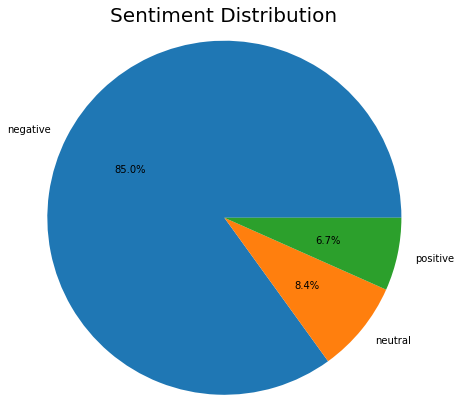

In [21]:
# Plotting pie chart of Sentiment Distribution of words
emotion = {0: "neutral",
           1: "positive",
          -1: "negative"}

words["sentiments"]=words["cluster_value"].map(emotion)

df_pie=words["sentiments"].value_counts().reset_index()
df_pie

fig = plt.gcf()
fig.set_size_inches(7,7)
plt.pie(df_pie["sentiments"],labels=df_pie["index"],radius=2,autopct="%1.1f%%")
plt.axis('equal')
plt.title("Sentiment Distribution", fontsize=20)
plt.show()

In [22]:
# define a function to get the sentiment for the entire tweet
def get_sentiments(x,sent_dict):
    '''
    x:         List
               Input data: Row of a DataFrame
    sent_dict: Dictionary
               Input: Dictionary of Words: Sentiments
    sentiment: String
               Output: Sentiment of the whole sentence
    
    Function: Getting sentiments of the entire sentence by averaging out the sentiments of individual words
    '''
    total=0
    count=0
    tweet=x["clean_tweet"]
    for t in tweet:
        if words_dict.get(t):
            total+=int(sent_dict.get(t))
        count+=1 
    avg=total/count
    sentiment=-1 if avg<-0.05 else 1 if avg >0.05 else 0
    return sentiment

In [23]:
# creating a dictionary of the word and its cluster value
words_dict = dict(zip(words.words, words.cluster_value))

In [24]:
# adding sentiment column
df["sentiment"]=df.apply(get_sentiments,args=(words_dict,),axis=1)

In [25]:
# value counts sentiment
df["sentiment"].value_counts()

 0    1681577
-1     740248
 1     456185
Name: sentiment, dtype: int64

In [26]:
df_neg = df[df["sentiment"]==-1]
df_pos = df[df["sentiment"]==1]
df_neu = df[df["sentiment"]==0]

In [27]:
df_neg['text'][0:10]
print('\n')
df_pos['text'][0:10]
print('\n')
df_neu['text'][0:10]

4     💹 trade #crypto on #binance \n\n📌 enjoy #cashb...
10    buy #bitcoin with 5% lifetime cashback on fees...
13    signal: $tfuel\n#tfuel #thetafuel #binance #cr...
15    forget all you know about #cryptocurrency \nth...
22    binance is the #1 crypto trading platform for ...
24    we accept #bitcoin, #bitcoincash #litecoin and...
27    🔵 upfront and personal!\n\nepisode 3: blockcha...
36    who want to learn about forex trading and join...
43    christmas came early! 🎄🎁❄️⛄️\n\nthe restore to...
45    as #bitcoin continues to soar, what should you...
Name: text, dtype: object

14    $ada sky rocket 🔥🚀 #patience 🔑\n$1 soon !!! \n...
16    $ada sky rocket 🔥🚀 #patience 🔑\n$1 soon !!! \n...
23    the @grayscale #bitcoin trust: what it is and ...
28    ok boomer. #bitcoin #btc \nhttps://t.co/qugryk...
30    holy smokes! $mara #btc #bitcoin https://t.co/...
32    price analysis 2/10: #btc, #eth, #ada, #xrp, #...
37    institutions are buying #bitcoin  \n\nover $10...
38    me while i'm hodling #bitcoin #btc https://t.c...
40    cme #bitcoin, avg volume break into the us ses...
41    if i was to ask every bitcoin whale for a chan...
Name: text, dtype: object

0     blue ridge bank shares halted by nyse after #b...
1     😎 today, that's this #thursday, we will do a "...
2     guys evening, i have read this article about b...
3     this network is secured by 9 508 nodes as of t...
5     #btc #bitcoin #ethereum #eth #crypto #cryptotr...
6     .@tesla’s #bitcoin investment is revolutionary...
7     annnd #btc #bitcoin is headed even higher now....
8     join our first virtual crypto meetup of 2021 -...
9     #bitcoin #btc $btc $gbtc $riot $mara $eth $eth...
11    @naval #btc is unconfiscatable \n\nall roads l...
Name: text, dtype: object

In [28]:
df_neg[30:50]
print('\n')
df_pos[30:50]
print('\n')
df_neu[30:50]

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_length,tweet_yyyymmdd,clean_tweet,cleaned_tweet,sentiment
174,233,Colin Robinson 🧛‍♂️,"Staten Island, NY",Satoshi Vampire. #gemhunter #wsb\n#uniswap #D...,2019-02-01 02:28:51,1598.0,5006.0,12445.0,False,2021-02-10 22:05:48,@cryptowizardd $kobe 🚀\n\n#yieldfarming\nmax ...,yieldfarming defi cryptocurrencies,Twitter for Android,False,139,2021-02-10,"['yieldfarming', 'max', 'supply', 'trade', 'de...",yieldfarming max supply trade defi cryptocurre...,-1
185,244,Colin Robinson 🧛‍♂️,"Staten Island, NY",Satoshi Vampire. #gemhunter #wsb\n#uniswap #D...,2019-02-01 02:28:51,1598.0,5006.0,12445.0,False,2021-02-10 22:02:15,@martiniguyyt $kobe 🚀\n\n#yieldfarming\nmax s...,yieldfarming defi cryptocurrencies,Twitter for Android,False,138,2021-02-10,"['yieldfarming', 'max', 'supply', 'trade', 'de...",yieldfarming max supply trade defi cryptocurre...,-1
190,250,Seekinganswers,NaN,The seeker becomes the finder.,2020-05-19 21:38:53,17.0,475.0,301.0,False,2021-02-10 22:00:55,@f2pool_official i see what your doin and so c...,cryptonews blockchain btc incryptowet...,Twitter for Android,False,132,2021-02-10,"['official', 'see', 'doin', 'everyone', 'else'...",official see doin everyone else cryptonews blo...,-1
191,251,Team42 Crypto,United Kingdom,@bitcoin & Crypto trader in the industry since...,2020-08-14 09:16:26,161.0,23.0,62.0,False,2021-02-10 22:00:45,#hoskinson sparks rumours of #apple and #oracl...,hoskinson apple oracle partnership ...,Twitter for iPhone,False,140,2021-02-10,"['hoskinson', 'spark', 'rumour', 'apple', 'ora...",hoskinson spark rumour apple oracle partnershi...,-1
193,260,Vandelay ₿TC Industries,NaN,#Bitcoin (#BTC) and #TSLA are now unstoppable....,2010-08-08 03:54:35,867.0,899.0,2659.0,False,2021-02-10 21:59:02,@fiona365andmore @maxkeiser @ecb immoral thiev...,NaN,Twitter Web App,False,140,2021-02-10,"['immoral', 'thievery', 'people', 'condition',...",immoral thievery people condition accept propa...,-1
194,261,ɮʊɢֆȶʀǟք,Indonesia,𝙎𝙡𝙚𝙚𝙥 𝙇𝙚𝙨𝙨 𝘼𝙧𝙢𝙮 - 𝙋𝙖𝙨𝙪𝙠𝙖𝙣 𝙅𝙖𝙧𝙖𝙣𝙜 𝙏𝙞𝙙𝙪𝙧\nAny ki...,2019-03-02 10:20:54,189.0,560.0,1872.0,False,2021-02-10 21:58:37,🤝 follow me on @betfury_io. let's hunt for bit...,NaN,Twitter Web App,False,140,2021-02-10,"['follow', 'io', 'let', ""'"", 'hunt', 'bitcoins...",follow io let ' hunt bitcoins together get exc...,-1
200,267,Elrond Hodler,The moon,hodling EGLD is my life purpose #egld to get $...,2018-03-12 23:15:00,60.0,320.0,43.0,False,2021-02-10 21:56:20,consolidation is healthy if you can't handle a...,egld,Twitter for iPhone,False,140,2021-02-10,"['consolidation', 'healthy', ""'"", 'handle', 'c...",consolidation healthy ' handle correction ' cr...,-1
206,273,Satoshistan ₿,Cuba,PRICE/TIME TRIANGULUM 📐 CHARCITECT\nThis page ...,2019-01-04 02:00:39,246.0,183.0,1580.0,False,2021-02-10 21:54:41,"i'm takin it back, wyckoff is still on the tab...",btc,Twitter Web App,False,139,2021-02-10,"[""'"", 'takin', 'back', 'wyckoff', 'still', 'ta...",' takin back wyckoff still table wait confirma...,-1
209,276,AceLolzz Crypto 26K 🍥,minepi.com/AceLolzz,Crypto Enthusiast & Influencer\nMain assets: B...,2012-10-20 08:11:59,26103.0,20718.0,6296.0,False,2021-02-10 21:54:30,join reflex cloud mining !!\n\n- #earn free cr...,earn,Twitter Web App,False,139,2021-02-10,"['join', 'reflex', 'cloud', 'mine', 'earn', 'f...",join reflex cloud mine earn free crypto phone ...,-1
211,278,AceLolzz Crypto 26K 🍥,minepi.com/AceLolzz,Crypto Enthusiast & Influencer\nMain assets: B...,2012-10-20 08:11:59,26103.0,20718.0,6296.0,False,2021-02-10 21:54:15,sign up for #freemining !!\n\n- claim daily #b...,freemining bitcoin,Twitter Web App,False,121,2021-02-10,"['sign', 'freemining', 'claim', 'daily', 'bitc...",sign freemining claim daily bitcoin daily free...,-1


,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_length,tweet_yyyymmdd,clean_tweet,cleaned_tweet,sentiment
133,178,Juan Gonzales,"San Diego, CA",Nico is the Name Crypto is the game!!!\n\nThe ...,2020-08-11 22:43:02,32.0,31.0,197.0,False,2021-02-10 22:35:42,i swear there is a squirrel 🐿️ in that bush ...,btc bitcorn bitcoin addme,Twitter for Android,False,125,2021-02-10,"['swear', 'squirrel', 'bush', 'btc', 'bitcorn'...",swear squirrel bush btc bitcorn bitcoin addme,1
136,185,Borsatakipcisi,"Konya, Türkiye",#Bitcoin,2018-11-25 11:49:39,186.0,347.0,5020.0,False,2021-02-10 22:30:29,$algo hey @grayscale look algo and stake good ...,btc bitcoin,Twitter for Android,False,128,2021-02-10,"['hey', 'look', 'algo', 'stake', 'good', 'pric...",hey look algo stake good price algo star hodl ...,1
142,193,Nishant Bhardwaj,"Kota, Rajasthan","Philosopher, psychologist, spiritual, writer a...",2010-07-01 06:59:21,662.0,155.0,915.0,False,2021-02-10 22:28:44,6 days and your money is more than double if y...,bitcoin btc doge,Twitter for iPhone,False,131,2021-02-10,"['day', 'money', 'double', 'get', 'decent', 'p...",day money double get decent profit bitcoin btc...,1
143,194,Royalty,Global Citizen,Emerging Leader | Silver Bullet | African Renn...,2009-05-07 06:11:31,31548.0,2734.0,26340.0,True,2021-02-10 22:28:03,if apple inc ever makes a move for #bitcoin as...,bitcoin btc,Twitter for iPhone,False,140,2021-02-10,"['apple', 'inc', 'ever', 'make', 'move', 'bitc...",apple inc ever make move bitcoin rumour assure...,1
146,197,Mohit Behrani,NaN,#Bitcoin,2018-03-23 09:54:33,14.0,269.0,544.0,False,2021-02-10 22:26:11,boom!!⚡️🔥💥https://t.co/boac4e3m27\n#btc #bitco...,btc bitcoin ethereum eth,Twitter Web App,False,86,2021-02-10,"['boom', 'btc', 'bitcoin', 'ethereum', 'eth']",boom btc bitcoin ethereum eth,1
149,201,RoNo Ⓥ,🐋 The Water Is My Stadium 🐋,#Crypto Ambassador\n$VET $OCE #Bitcoin $SHA $V...,2018-02-13 16:02:48,3790.0,753.0,35256.0,False,2021-02-10 22:25:02,$htr could be your next $dot $ada $snx or $bnb...,bitcoin btc bnb,Twitter Web App,False,136,2021-02-10,"['could', 'next', 'bitcoin', 'btc', 'bnb']",could next bitcoin btc bnb,1
152,204,Michell sanchez,"Florida, USA","Cuban born, American raised. Chef and Owner of...",2017-05-27 19:01:50,81.0,401.0,1556.0,False,2021-02-10 22:23:14,this dip feels like the big dogs are working b...,NaN,Twitter for iPhone,False,140,2021-02-10,"['dip', 'feel', 'like', 'big', 'dog', 'work', ...",dip feel like big dog work behind scene buy mi...,1
157,209,xbt_blvrg,NaN,I trade crypto futures and flip #BTC.,2011-11-09 16:38:56,634.0,192.0,514.0,False,2021-02-10 22:19:59,$btc\n\nslowly starting to add back on my long...,btc bitcoin crypto,Twitter for iPhone,False,110,2021-02-10,"['slowly', 'start', 'add', 'back', 'long', 'bt...",slowly start add back long btc bitcoin crypto,1
159,212,Omar Arrawi,"England, United Kingdom",BCH is the best cash so far. Tweet at me!\nInt...,2020-06-13 14:38:29,70.0,1356.0,265.0,False,2021-02-10 22:18:53,btc payment still not done\nit's 21:18 pm now\...,NaN,Twitter for Android,False,140,2021-02-10,"['btc', 'payment', 'still', 'do', ""'"", 'pm', '...",btc payment still do ' pm know take least anot...,1
163,217,CryptoParos,New York,Pilot + Industrial Engineer + PhD in World Pol...,2020-09-04 23:54:04,4150.0,0.0,1802.0,False,2021-02-10 22:13:45,"#rsrbtc hit the third target, 127 sats.🚀🚀🚀\n\n...",rsrbtc rsr rsrbtc rsrusdt btc,Twitter Web App,False,137,2021-02-10,"['rsrbtc', 'hit', 'third', 'target', 'sit', 'p...",rsrbtc hit third target sit profit bag already...,1


,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_length,tweet_yyyymmdd,clean_tweet,cleaned_tweet,sentiment
54,71,Douglas Borthwick 🏴󠁧󠁢󠁳󠁣󠁴󠁿,"New: York, Canaan, Haven","Chief Marketing Officer, Head of Biz Developme...",2010-07-25 14:56:44,6588.0,706.0,3054.0,False,2021-02-10 23:22:26,any company that wants to shield income from t...,bitcoin,Twitter for Android,False,140,2021-02-10,"['company', 'want', 'shield', 'income', 'tax',...",company want shield income tax follow example ...,0
55,72,Crypto Funder,Crypto Heaven,Crypto NEWS and SPECULATIONS 📰,2021-02-10 21:22:18,6.0,0.0,29.0,False,2021-02-10 23:22:02,$129 million of bitcoin was moved from one col...,NaN,Twitter Web App,False,142,2021-02-10,"['million', 'bitcoin', 'move', 'one', 'cold', ...",million bitcoin move one cold storage wallet n...,0
56,73,Bitcoin SpaceX,"New York, USA",#Bitcoin #Cryptocurrency,2019-10-05 15:49:39,394.0,539.0,5122.0,False,2021-02-10 23:21:44,my opinion is the clients - either migros swit...,NaN,Twitter for iPhone,False,140,2021-02-10,"['opinion', 'client', 'either', 'migros', 'swi...",opinion client either migros switzerland buy a...,0
57,74,Trading MarcoDaCosta,StocksLand 💶💵💷,Investor. Trader. Thinker. Trading Strategist....,2010-03-01 19:35:17,5366.0,927.0,34484.0,False,2021-02-10 23:21:19,$ma 💳 #mastercard will let merchants accept #p...,mastercard payments crypto bitcoin ...,Twitter for iPhone,False,135,2021-02-10,"['mastercard', 'let', 'merchant', 'accept', 'p...",mastercard let merchant accept payment crypto ...,0
61,78,Hamzasb,NaN,@ElrondNetwork #Maiar #EGLD #dogecointoadollar...,2020-07-14 16:44:01,291.0,991.0,5485.0,False,2021-02-10 23:19:24,we are starting a #revolution with @elrondnetw...,revolution maiar ada,Twitter for Android,False,136,2021-02-10,"['start', 'revolution', 'download', 'maiar', '...",start revolution download maiar see hype ada,0
63,81,News Corpse,The Cemetary...USA,Let NewsCorpse78 be your source for odd news o...,2011-12-27 03:20:50,3072.0,3336.0,24.0,False,2021-02-10 23:18:38,forget #dogecoin. #bitcoin is still available ...,dogecoin bitcoin,Twitter Web App,False,139,2021-02-10,"['forget', 'dogecoin', 'bitcoin', 'still', 'av...",forget dogecoin bitcoin still available u poor...,0
66,84,CryptJj,NaN,𝚂𝚒𝚗𝚌𝚎 𝟸𝟶𝟷𝟽... 𝙺𝚎𝚎𝚙𝚒𝚗𝚐 𝚎𝚢𝚎𝚜 𝚙𝚎𝚎𝚕𝚎𝚍 𝚏𝚘𝚛 𝚖𝚘𝚛𝚎 𝚌𝚛𝚢...,2020-12-17 09:11:56,49.0,243.0,192.0,False,2021-02-10 23:16:41,"one of the slickest, sexiest, easy to use wall...",NaN,Twitter for iPhone,False,140,2021-02-10,"['one', 'slickest', 'sexiest', 'easy', 'use', ...",one slickest sexiest easy use wallet ever find...,0
67,85,Simon Johnson,Australia 🇦🇺,Security • Risk • Ex Banker • Online Since 198...,2008-04-23 06:58:19,11784.0,3811.0,110.0,False,2021-02-10 23:15:40,big news from mastercard. they are working to ...,crypto,Twitter for iPhone,False,135,2021-02-10,"['big', 'news', 'mastercard', 'work', 'support...",big news mastercard work support crypto guess ...,0
68,86,Billions777,"Beverly Hills, CA Aspen, CO",++High Alpha Super Growth Investing: Crypto #B...,2019-12-20 22:25:41,313.0,434.0,3994.0,False,2021-02-10 23:13:36,#btc #bitcoin and here we go again!\n\n@elonmu...,btc bitcoin wsb wallstreetbets coi...,Twitter Web App,False,139,2021-02-10,"['btc', 'bitcoin', 'go', 'wsb', 'wallstreetbet...",btc bitcoin go wsb wallstreetbets coinbase bin...,0
69,87,CryptJj,NaN,𝚂𝚒𝚗𝚌𝚎 𝟸𝟶𝟷𝟽... 𝙺𝚎𝚎𝚙𝚒𝚗𝚐 𝚎𝚢𝚎𝚜 𝚙𝚎𝚎𝚕𝚎𝚍 𝚏𝚘𝚛 𝚖𝚘𝚛𝚎 𝚌𝚛𝚢...,2020-12-17 09:11:56,49.0,243.0,192.0,False,2021-02-10 23:13:09,don’t forget to vote for the next coin to be a...,NaN,Twitter for iPhone,False,140,2021-02-10,"['forget', 'vote', 'next', 'coin', 'add', 'wal...",forget vote next coin add wallet lick lip anti...,0


In [29]:
df[30:50]

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_length,tweet_yyyymmdd,clean_tweet,cleaned_tweet,sentiment
30,38,CappyTrades🍀,NaN,Calling out tickers that you should probably l...,2020-10-08 23:24:36,99.0,89.0,1568.0,False,2021-02-10 23:35:27,holy smokes! $mara #btc #bitcoin https://t.co/...,btc bitcoin,Twitter Web App,False,56,2021-02-10,"['holy', 'smoke', 'btc', 'bitcoin']",holy smoke btc bitcoin,1
31,40,#Mailey,"Vancouver, BC",Lucky fool making decisions and money based on...,2020-11-03 19:10:23,314.0,182.0,8639.0,False,2021-02-10 23:34:58,free #mailey advice:\n\nimagine in 2019 there ...,mailey bitcoin btc,Twitter Web App,False,140,2021-02-10,"['free', 'mailey', 'advice', 'imagine', 'bitco...",free mailey advice imagine bitcoin mine compan...,0
32,41,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:34:33,"price analysis 2/10: #btc, #eth, #ada, #xrp, #...",btc eth ada xrp dot bnb ltc ...,Twitter Web App,False,135,2021-02-10,"['price', 'analysis', 'btc', 'eth', 'ada', 'xr...",price analysis btc eth ada xrp dot bnb ltc lin...,1
33,42,The Third Coast,NaN,Straightforward technical analysis for equitie...,2020-05-14 22:20:54,202.0,28.0,659.0,False,2021-02-10 23:34:25,rally got a little ahead of itself for #bitcoi...,bitcoin tesla,Twitter Web App,False,140,2021-02-10,"['rally', 'get', 'little', 'ahead', 'bitcoin',...",rally get little ahead bitcoin tweet tesla new...,0
34,43,Mike Sharkey,NaN,#Cryptocurrency Investor. @Penn_State Alum. #T...,2009-05-17 15:00:52,896.0,2437.0,5001.0,False,2021-02-10 23:34:04,$tel everyone... #cgash marketing may begin to...,cgash telcoin kucoin,Twitter for iPhone,False,140,2021-02-10,"['everyone', 'cgash', 'market', 'may', 'begin'...",everyone cgash market may begin tomorrow buy t...,0
35,46,Nishant Bhardwaj,"Kota, Rajasthan","Philosopher, psychologist, spiritual, writer a...",2010-07-01 06:59:21,662.0,155.0,915.0,False,2021-02-10 23:33:00,$cvc. that’s the tweet. 🚀 \n\n#bitcoin #btc #d...,bitcoin btc dogecoin,Twitter for iPhone,False,75,2021-02-10,"['tweet', 'bitcoin', 'btc', 'dogecoin']",tweet bitcoin btc dogecoin,0
36,47,Tonya Barris,NaN,NaN,2020-12-29 16:55:33,0.0,16.0,2.0,False,2021-02-10 23:32:35,who want to learn about forex trading and join...,forex forexsignals trading forextrade...,Twitter for iPhone,False,140,2021-02-10,"['want', 'learn', 'forex', 'trade', 'join', 'g...",want learn forex trade join great team forex f...,-1
37,48,WSB Crypto Mod 🚀🚀🚀,NaN,If #Wallstreetbets can take on Banks & Hedge F...,2018-01-23 21:49:55,4309.0,941.0,4839.0,False,2021-02-10 23:32:14,institutions are buying #bitcoin \n\nover $10...,bitcoin,Twitter for iPhone,False,139,2021-02-10,"['institution', 'buy', 'bitcoin', 'million', '...",institution buy bitcoin million worth get move...,1
38,49,Langer Dan Returns,Wouldn't You like to know.,A victim of radical social media censorship.,2020-11-04 11:26:40,31.0,26.0,1207.0,False,2021-02-10 23:32:12,me while i'm hodling #bitcoin #btc https://t.c...,bitcoin btc,Twitter Web App,False,58,2021-02-10,"[""'"", 'hodling', 'bitcoin', 'btc']",' hodling bitcoin btc,1
39,50,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:31:40,#crypto prices | 6:30 pm | 2/10/21 https://t.c...,crypto bitcoin btc ethereum eth ...,Twitter Web App,False,131,2021-02-10,"['crypto', 'price', 'pm', 'bitcoin', 'btc', 'e...",crypto price pm bitcoin btc ethereum eth tethe...,0


In [30]:
# export tweet data

df.to_csv('tweets_cleaned.csv')

drive.mount('/content/drive', force_remount=True)
path = '/content/drive/My Drive/bitcoin_price_prediction/three_cluster_tweets_data.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

Mounted at /content/drive


# Two Cluster Model

In [31]:
#Feeding the embeddings to a KMeans model to cluster words into positive, negative, and neutral clusters
model = KMeans(n_clusters=2, max_iter=1000, random_state=10, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [32]:
# check label clusters
word_vectors.similar_by_vector(model.cluster_centers_[0], topn=100, restrict_vocab=None)
print('\n')
word_vectors.similar_by_vector(model.cluster_centers_[1], topn=100, restrict_vocab=None)

[('governmental', 0.706074059009552),
 ('warfare', 0.7051443457603455),
 ('oppose', 0.7031493186950684),
 ('mean', 0.6850659251213074),
 ('incumbent', 0.6782455444335938),
 ('actually', 0.6766868829727173),
 ('incompetence', 0.6751161813735962),
 ('hubris', 0.672402560710907),
 ('impede', 0.6717165112495422),
 ('destructive', 0.6716263294219971),
 ('antithetical', 0.6713345646858215),
 ('need', 0.6704385876655579),
 ('negligence', 0.6668089032173157),
 ('unfortunately', 0.6648457050323486),
 ('politicize', 0.6645804643630981),
 ('statism', 0.6630608439445496),
 ('exclusion', 0.6614553928375244),
 ('denounce', 0.6613760590553284),
 ('concern', 0.6612914800643921),
 ('advocate', 0.661076009273529),
 ('essentially', 0.6610224843025208),
 ('ie', 0.6602915525436401),
 ('force', 0.6597280502319336),
 ('ideological', 0.6593725085258484),
 ('dismantle', 0.6588931679725647),
 ('prevent', 0.6573103666305542),
 ('activist', 0.6563624143600464),
 ('coordination', 0.6555084586143494),
 ('societal',

[('dwon', 0.9180189371109009),
 ('sweetlife', 0.8984531164169312),
 ('acbbchris', 0.8920482397079468),
 ('bence', 0.8918049931526184),
 ('tomriddle', 0.8869900703430176),
 ('bhhg', 0.882750391960144),
 ('qre', 0.8805651664733887),
 ('jacoob', 0.8799563050270081),
 ('wesh', 0.8748898506164551),
 ('mamat', 0.8739263415336609),
 ('pollak', 0.8721869587898254),
 ('squeamy', 0.8718823194503784),
 ('dhwsvury', 0.8717931509017944),
 ('thejoe', 0.8715786933898926),
 ('holdear', 0.8667700886726379),
 ('mrmoon', 0.8657918572425842),
 ('itsthedude', 0.8653573393821716),
 ('healthequity', 0.8650374412536621),
 ('digibyteme', 0.8643811345100403),
 ('aprilwintergamesnft', 0.8632144927978516),
 ('theunsceneone', 0.8620959520339966),
 ('wizardoz', 0.8619506359100342),
 ('thewizardofsouthtown', 0.8606401085853577),
 ('skeemsaam', 0.8582203984260559),
 ('droneshow', 0.8577936291694641),
 ('johnjohnson', 0.8572913408279419),
 ('pcpunch', 0.8571994304656982),
 ('kozmikhunt', 0.8570660352706909),
 ('endone

In [33]:
# Label the clusters based on the type of words they carry
negative_cluster_center = model.cluster_centers_[0]
positive_cluster_center = model.cluster_centers_[1]

In [34]:
#Creating a DataFrame of words with their embeddings and cluster values
words = pd.DataFrame(word_vectors.index_to_key)
words[0:10]

,0
0,bitcoin
1,btc
2,crypto
3,'
4,project
5,eth
6,cryptocurrency
7,airdrop
8,nft
9,bsc


In [35]:
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

# https://towardsdatascience.com/unsupervised-sentiment-analysis-a38bf1906483

In [36]:
#Assigning 1 to positive values and -1 for negative values
words['cluster_value'] = [1 if i==1 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)

In [39]:
words[words["cluster_value"]== -1][0:50].sort_values("closeness_score",ascending=False)
words[words["cluster_value"]== 1][0:50].sort_values("closeness_score",ascending=False)

,words,vectors,cluster,cluster_value,closeness_score
3,',"[0.368011, -0.8209392, 0.38262936, -1.2037275,...",0,-1,0.070058
18,amp,"[1.1297174, 0.63307786, -0.49846926, 1.753668,...",0,-1,0.069011
74,today,"[1.1998255, -0.066303656, 1.2622657, 1.2613254...",0,-1,0.068224
78,need,"[-0.26916653, -0.011728296, -1.3116653, 0.9300...",0,-1,0.067748
42,think,"[-0.9102361, -3.0317893, 0.21688545, -0.151211...",0,-1,0.065094
62,know,"[-2.1561406, -1.7763896, -0.16259633, 0.091628...",0,-1,0.063832
14,go,"[-0.7763024, -3.674676, 2.2292342, 0.074365355...",0,-1,0.059974
34,one,"[-0.91903824, -2.5944736, -0.12799658, 0.16222...",0,-1,0.059613
28,like,"[-2.4599376, -3.2425532, -0.8795241, -0.321812...",0,-1,0.057802
76,still,"[-0.19504708, -4.1412625, -0.62470263, 2.26620...",0,-1,0.056725


,words,vectors,cluster,cluster_value,closeness_score
0,bitcoin,"[-0.04797508, 0.36701757, -0.99913824, 1.94436...",1,1,0.082222
2,crypto,"[1.4932108, 0.2142749, 0.7849326, 0.7673306, -...",1,1,0.070177
1,btc,"[-0.10240886, 0.44411242, -2.035026, 1.3435596...",1,1,0.065687
119,hodl,"[2.049842, -2.988656, 3.2347171, 0.22729202, 0...",1,1,0.054335
6,cryptocurrency,"[1.6356678, -1.3968608, -1.220815, 1.4621158, ...",1,1,0.053517
61,cryptocurrencies,"[-0.28419527, 2.9106205, 1.0874286, 1.2438507,...",1,1,0.051720
11,ethereum,"[-0.40740958, 0.7808129, 0.23910879, -0.151522...",1,1,0.049702
90,altcoins,"[1.6329664, -0.20520423, 0.036024965, -0.02309...",1,1,0.049277
5,eth,"[-0.6412738, -0.051880695, 1.516447, 2.4825015...",1,1,0.048629
121,news,"[0.39066222, 0.9068282, -1.2204719, 3.7269676,...",1,1,0.046036


In [40]:
positive = ['rocket', 'moon', 'upside', 'mars', 'lambo', 'tendies', 'rich', 'pump', 'bullish', 'bull', 
            'ath', 'amaze', 'token', 'successful', 'reward', 'vault', 'bulls', 'winner', 'winners', 'explode',
            'winning', 'printer', 'printing', 'money', 'moneytree']
negative = ['cryptocurrencies', 'altcoins', 'nft', 'altcoin', 'musk', 'poor', 'dump', 'bearish', 'bear', 
            'atl', 'risk', 'downside', 'trap', 'garbage', 'trash', 'bears', 'loser', 'losers', 'waste', 'sink',
            'losing', 'zero']

for i in positive:
    words.loc[words["words"]==i,"cluster_value"]=1
       
for i in negative:
    words.loc[words["words"]==i,"cluster_value"]=-1

,index,sentiments
0,positive,81297
1,negative,6424


([<matplotlib.patches.Wedge at 0x7f205cc0c190>,
 [Text(-2.142033132789597, 0.5016911978813103, 'positive'),
  Text(2.142033144532527, -0.5016911477434062, 'negative')],
 [Text(-1.1683817087943256, 0.27364974429889655, '92.7%'),
  Text(1.16838171519956, -0.27364971695094875, '7.3%')])

(-2.2153070217258426,
 2.2007289133267625,
 -2.2051757677412716,
 2.2156540493624495)

Text(0.5, 1.0, 'Sentiment Distribution')

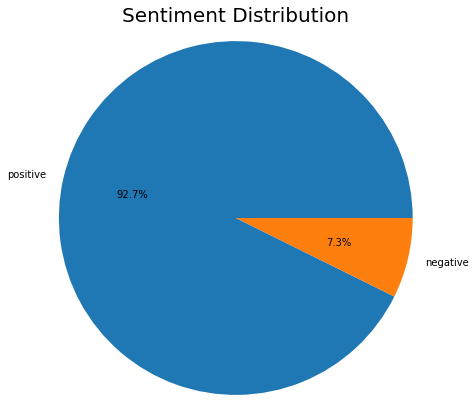

In [41]:
# Plotting pie chart of Sentiment Distribution of words
emotion = {1: "positive",
          -1: "negative"}

words["sentiments"]=words["cluster_value"].map(emotion)

df_pie=words["sentiments"].value_counts().reset_index()
df_pie

fig = plt.gcf()
fig.set_size_inches(7,7)
plt.pie(df_pie["sentiments"],labels=df_pie["index"],radius=2,autopct="%1.1f%%")
plt.axis('equal')
plt.title("Sentiment Distribution", fontsize=20)
plt.show()

In [43]:
# define a function to get the sentiment for the entire tweet
def get_sentiments_two(x,sent_dict):
    '''
    x:         List
               Input data: Row of a DataFrame
    sent_dict: Dictionary
               Input: Dictionary of Words: Sentiments
    sentiment: String
               Output: Sentiment of the whole sentence
    
    Function: Getting sentiments of the entire sentence by averaging out the sentiments of individual words
    '''
    total=0
    count=0
    tweet=x["clean_tweet"]
    for t in tweet:
        if words_dict.get(t):
            total+=int(sent_dict.get(t))
        count+=1 
    avg=total/count
    sentiment=-1 if avg<-0.05 else 1 
    return sentiment

In [44]:
# creating a dictionary of the word and its cluster value
words_dict = dict(zip(words.words, words.cluster_value))

In [45]:
df_two[0:10] # make sure we have a clean copy

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_length,tweet_yyyymmdd,clean_tweet,cleaned_tweet
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after #b...,bitcoin,Twitter Web App,False,135,2021-02-10,"['blue', 'ridge', 'bank', 'share', 'halt', 'ny...",blue ridge bank share halt nyse bitcoin atm an...
1,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10 23:58:48,"😎 today, that's this #thursday, we will do a ""...",thursday btc wallet security,Twitter for Android,False,140,2021-02-10,"['today', ""'"", 'thursday', 'take', 'friend', '...",today ' thursday take friend btc wallet securi...
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,False,2021-02-10 23:54:48,"guys evening, i have read this article about b...",NaN,Twitter Web App,False,136,2021-02-10,"['guy', 'even', 'read', 'article', 'btc', 'wou...",guy even read article btc would like share
3,4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,False,2021-02-10 23:54:06,this network is secured by 9 508 nodes as of t...,btc,Twitter Web App,False,140,2021-02-10,"['network', 'secure', 'node', 'today', 'soon',...",network secure node today soon biggest bear re...
4,5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716.0,2444.0,False,2021-02-10 23:53:30,💹 trade #crypto on #binance \n\n📌 enjoy #cashb...,crypto binance cashback,Twitter Web App,False,136,2021-02-10,"['trade', 'crypto', 'binance', 'enjoy', 'cashb...",trade crypto binance enjoy cashback trade fee ...
5,8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41.0,238.0,False,2021-02-10 23:52:25,#btc #bitcoin #ethereum #eth #crypto #cryptotr...,btc bitcoin ethereum eth crypto ...,Twitter Web App,False,139,2021-02-10,"['btc', 'bitcoin', 'ethereum', 'eth', 'crypto'...",btc bitcoin ethereum eth crypto cryptotrading ...
6,9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:52:08,.@tesla’s #bitcoin investment is revolutionary...,bitcoin crypto,Twitter Web App,False,140,2021-02-10,"['bitcoin', 'investment', 'revolutionary', 'cr...",bitcoin investment revolutionary crypto firm m...
7,10,@massumeh18 #RefinedWarrior #Activist,NOVA,Persistent. to the extreme... #FREEPALESTINE #...,2009-01-05 13:28:47,1159.0,2185.0,30852.0,False,2021-02-10 23:52:04,annnd #btc #bitcoin is headed even higher now....,btc bitcoin,Twitter Web App,False,72,2021-02-10,"['annnd', 'btc', 'bitcoin', 'head', 'even', 'h...",annnd btc bitcoin head even higher
8,12,CPUcoin,Cayman Islands,The Sharing Economy for CPU/GPU Power. Revolut...,2018-08-27 15:42:00,5097.0,791.0,52.0,False,2021-02-10 23:50:59,join our first virtual crypto meetup of 2021 -...,NaN,Twitter Web App,False,139,2021-02-10,"['join', 'first', 'virtual', 'crypto', 'meetup...",join first virtual crypto meetup crypto friday...
9,13,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097.0,6853.0,False,2021-02-10 23:50:30,#bitcoin #btc $btc $gbtc $riot $mara $eth $eth...,bitcoin btc aave defi crypto cr...,Twitter for Android,False,135,2021-02-10,"['bitcoin', 'btc', 'aave', 'defi', 'crypto', '...",bitcoin btc aave defi crypto cryptocurrency


In [46]:
# adding sentiment column
df_two["sentiment"]=df_two.apply(get_sentiments_two,args=(words_dict,),axis=1)

In [47]:
# value counts sentiment
df_two["sentiment"].value_counts()

 1    2539027
-1     338983
Name: sentiment, dtype: int64

In [48]:
df_two_neg = df_two[df_two["sentiment"]==-1]
df_two_pos = df_two[df_two["sentiment"]==1]

In [49]:
df_two_neg[0:10]
print('\n')
df_two_pos[0:10]

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_length,tweet_yyyymmdd,clean_tweet,cleaned_tweet,sentiment
14,20,Crypto Market,NaN,"Live crypto market indicator (price, news, ico...",2018-09-07 22:44:40,26.0,57.0,115.0,False,2021-02-10 23:46:23,$ada sky rocket 🔥🚀 #patience 🔑\n$1 soon !!! \n...,patience ada adausdt btc bitcoin ...,Twitter for Android,False,104,2021-02-10,"['sky', 'rocket', 'patience', 'soon', 'ada', '...",sky rocket patience soon ada adausdt btc bitco...,-1
16,22,Humayun MHA,Pakistan,💻 Android App Developer\n📈 Crypto & Forex Trad...,2016-08-18 22:00:24,1392.0,780.0,960.0,False,2021-02-10 23:45:20,$ada sky rocket 🔥🚀 #patience 🔑\n$1 soon !!! \n...,patience ada adausdt btc bitcoin ...,Twitter for Android,False,104,2021-02-10,"['sky', 'rocket', 'patience', 'soon', 'ada', '...",sky rocket patience soon ada adausdt btc bitco...,-1
23,31,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:40:36,the @grayscale #bitcoin trust: what it is and ...,bitcoin digital asset fund btc,Twitter Web App,False,140,2021-02-10,"['bitcoin', 'trust', 'work', 'digital', 'asset...",bitcoin trust work digital asset fund btc,-1
28,36,NatoShƐƐ 🚀🔴🦂,NaN,"#BITCOIN \n21 Million, 21st year, 21st century...",2010-06-18 11:29:12,93.0,532.0,1151.0,False,2021-02-10 23:36:52,ok boomer. #bitcoin #btc \nhttps://t.co/qugryk...,bitcoin btc,Twitter Web App,False,49,2021-02-10,"['ok', 'boomer', 'bitcoin', 'btc']",ok boomer bitcoin btc,-1
30,38,CappyTrades🍀,NaN,Calling out tickers that you should probably l...,2020-10-08 23:24:36,99.0,89.0,1568.0,False,2021-02-10 23:35:27,holy smokes! $mara #btc #bitcoin https://t.co/...,btc bitcoin,Twitter Web App,False,56,2021-02-10,"['holy', 'smoke', 'btc', 'bitcoin']",holy smoke btc bitcoin,-1
32,41,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:34:33,"price analysis 2/10: #btc, #eth, #ada, #xrp, #...",btc eth ada xrp dot bnb ltc ...,Twitter Web App,False,135,2021-02-10,"['price', 'analysis', 'btc', 'eth', 'ada', 'xr...",price analysis btc eth ada xrp dot bnb ltc lin...,-1
37,48,WSB Crypto Mod 🚀🚀🚀,NaN,If #Wallstreetbets can take on Banks & Hedge F...,2018-01-23 21:49:55,4309.0,941.0,4839.0,False,2021-02-10 23:32:14,institutions are buying #bitcoin \n\nover $10...,bitcoin,Twitter for iPhone,False,139,2021-02-10,"['institution', 'buy', 'bitcoin', 'million', '...",institution buy bitcoin million worth get move...,-1
38,49,Langer Dan Returns,Wouldn't You like to know.,A victim of radical social media censorship.,2020-11-04 11:26:40,31.0,26.0,1207.0,False,2021-02-10 23:32:12,me while i'm hodling #bitcoin #btc https://t.c...,bitcoin btc,Twitter Web App,False,58,2021-02-10,"[""'"", 'hodling', 'bitcoin', 'btc']",' hodling bitcoin btc,-1
40,51,Brock Connelly 📉📈,OptionsOnBitcoin.com,Founder- RoundBlock Capital - CME #BITCOIN #ET...,2019-04-09 21:28:48,513.0,457.0,1837.0,False,2021-02-10 23:31:39,"cme #bitcoin, avg volume break into the us ses...",bitcoin btc,Twitter Web App,False,140,2021-02-10,"['cme', 'bitcoin', 'avg', 'volume', 'break', '...",cme bitcoin avg volume break u session sell sh...,-1
44,57,Bar Trader🍸,Deutschland,life is sarcastic tho... #potstocks #crypto #g...,2020-03-16 22:16:20,429.0,77.0,34734.0,False,2021-02-10 23:28:47,@nikon_invest friends in early 2017 like „mate...,bitcoin,Twitter for iPhone,False,140,2021-02-10,"['invest', 'friend', 'early', 'like', 'mate', ...",invest friend early like mate better burn mone...,-1


,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_length,tweet_yyyymmdd,clean_tweet,cleaned_tweet,sentiment
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after #b...,bitcoin,Twitter Web App,False,135,2021-02-10,"['blue', 'ridge', 'bank', 'share', 'halt', 'ny...",blue ridge bank share halt nyse bitcoin atm an...,1
1,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10 23:58:48,"😎 today, that's this #thursday, we will do a ""...",thursday btc wallet security,Twitter for Android,False,140,2021-02-10,"['today', ""'"", 'thursday', 'take', 'friend', '...",today ' thursday take friend btc wallet securi...,1
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,False,2021-02-10 23:54:48,"guys evening, i have read this article about b...",NaN,Twitter Web App,False,136,2021-02-10,"['guy', 'even', 'read', 'article', 'btc', 'wou...",guy even read article btc would like share,1
3,4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,False,2021-02-10 23:54:06,this network is secured by 9 508 nodes as of t...,btc,Twitter Web App,False,140,2021-02-10,"['network', 'secure', 'node', 'today', 'soon',...",network secure node today soon biggest bear re...,1
4,5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716.0,2444.0,False,2021-02-10 23:53:30,💹 trade #crypto on #binance \n\n📌 enjoy #cashb...,crypto binance cashback,Twitter Web App,False,136,2021-02-10,"['trade', 'crypto', 'binance', 'enjoy', 'cashb...",trade crypto binance enjoy cashback trade fee ...,1
5,8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41.0,238.0,False,2021-02-10 23:52:25,#btc #bitcoin #ethereum #eth #crypto #cryptotr...,btc bitcoin ethereum eth crypto ...,Twitter Web App,False,139,2021-02-10,"['btc', 'bitcoin', 'ethereum', 'eth', 'crypto'...",btc bitcoin ethereum eth crypto cryptotrading ...,1
6,9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:52:08,.@tesla’s #bitcoin investment is revolutionary...,bitcoin crypto,Twitter Web App,False,140,2021-02-10,"['bitcoin', 'investment', 'revolutionary', 'cr...",bitcoin investment revolutionary crypto firm m...,1
7,10,@massumeh18 #RefinedWarrior #Activist,NOVA,Persistent. to the extreme... #FREEPALESTINE #...,2009-01-05 13:28:47,1159.0,2185.0,30852.0,False,2021-02-10 23:52:04,annnd #btc #bitcoin is headed even higher now....,btc bitcoin,Twitter Web App,False,72,2021-02-10,"['annnd', 'btc', 'bitcoin', 'head', 'even', 'h...",annnd btc bitcoin head even higher,1
8,12,CPUcoin,Cayman Islands,The Sharing Economy for CPU/GPU Power. Revolut...,2018-08-27 15:42:00,5097.0,791.0,52.0,False,2021-02-10 23:50:59,join our first virtual crypto meetup of 2021 -...,NaN,Twitter Web App,False,139,2021-02-10,"['join', 'first', 'virtual', 'crypto', 'meetup...",join first virtual crypto meetup crypto friday...,1
9,13,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097.0,6853.0,False,2021-02-10 23:50:30,#bitcoin #btc $btc $gbtc $riot $mara $eth $eth...,bitcoin btc aave defi crypto cr...,Twitter for Android,False,135,2021-02-10,"['bitcoin', 'btc', 'aave', 'defi', 'crypto', '...",bitcoin btc aave defi crypto cryptocurrency,1


In [50]:
df_two[30:50]

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_length,tweet_yyyymmdd,clean_tweet,cleaned_tweet,sentiment
30,38,CappyTrades🍀,NaN,Calling out tickers that you should probably l...,2020-10-08 23:24:36,99.0,89.0,1568.0,False,2021-02-10 23:35:27,holy smokes! $mara #btc #bitcoin https://t.co/...,btc bitcoin,Twitter Web App,False,56,2021-02-10,"['holy', 'smoke', 'btc', 'bitcoin']",holy smoke btc bitcoin,-1
31,40,#Mailey,"Vancouver, BC",Lucky fool making decisions and money based on...,2020-11-03 19:10:23,314.0,182.0,8639.0,False,2021-02-10 23:34:58,free #mailey advice:\n\nimagine in 2019 there ...,mailey bitcoin btc,Twitter Web App,False,140,2021-02-10,"['free', 'mailey', 'advice', 'imagine', 'bitco...",free mailey advice imagine bitcoin mine compan...,1
32,41,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:34:33,"price analysis 2/10: #btc, #eth, #ada, #xrp, #...",btc eth ada xrp dot bnb ltc ...,Twitter Web App,False,135,2021-02-10,"['price', 'analysis', 'btc', 'eth', 'ada', 'xr...",price analysis btc eth ada xrp dot bnb ltc lin...,-1
33,42,The Third Coast,NaN,Straightforward technical analysis for equitie...,2020-05-14 22:20:54,202.0,28.0,659.0,False,2021-02-10 23:34:25,rally got a little ahead of itself for #bitcoi...,bitcoin tesla,Twitter Web App,False,140,2021-02-10,"['rally', 'get', 'little', 'ahead', 'bitcoin',...",rally get little ahead bitcoin tweet tesla new...,1
34,43,Mike Sharkey,NaN,#Cryptocurrency Investor. @Penn_State Alum. #T...,2009-05-17 15:00:52,896.0,2437.0,5001.0,False,2021-02-10 23:34:04,$tel everyone... #cgash marketing may begin to...,cgash telcoin kucoin,Twitter for iPhone,False,140,2021-02-10,"['everyone', 'cgash', 'market', 'may', 'begin'...",everyone cgash market may begin tomorrow buy t...,1
35,46,Nishant Bhardwaj,"Kota, Rajasthan","Philosopher, psychologist, spiritual, writer a...",2010-07-01 06:59:21,662.0,155.0,915.0,False,2021-02-10 23:33:00,$cvc. that’s the tweet. 🚀 \n\n#bitcoin #btc #d...,bitcoin btc dogecoin,Twitter for iPhone,False,75,2021-02-10,"['tweet', 'bitcoin', 'btc', 'dogecoin']",tweet bitcoin btc dogecoin,1
36,47,Tonya Barris,NaN,NaN,2020-12-29 16:55:33,0.0,16.0,2.0,False,2021-02-10 23:32:35,who want to learn about forex trading and join...,forex forexsignals trading forextrade...,Twitter for iPhone,False,140,2021-02-10,"['want', 'learn', 'forex', 'trade', 'join', 'g...",want learn forex trade join great team forex f...,1
37,48,WSB Crypto Mod 🚀🚀🚀,NaN,If #Wallstreetbets can take on Banks & Hedge F...,2018-01-23 21:49:55,4309.0,941.0,4839.0,False,2021-02-10 23:32:14,institutions are buying #bitcoin \n\nover $10...,bitcoin,Twitter for iPhone,False,139,2021-02-10,"['institution', 'buy', 'bitcoin', 'million', '...",institution buy bitcoin million worth get move...,-1
38,49,Langer Dan Returns,Wouldn't You like to know.,A victim of radical social media censorship.,2020-11-04 11:26:40,31.0,26.0,1207.0,False,2021-02-10 23:32:12,me while i'm hodling #bitcoin #btc https://t.c...,bitcoin btc,Twitter Web App,False,58,2021-02-10,"[""'"", 'hodling', 'bitcoin', 'btc']",' hodling bitcoin btc,-1
39,50,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:31:40,#crypto prices | 6:30 pm | 2/10/21 https://t.c...,crypto bitcoin btc ethereum eth ...,Twitter Web App,False,131,2021-02-10,"['crypto', 'price', 'pm', 'bitcoin', 'btc', 'e...",crypto price pm bitcoin btc ethereum eth tethe...,1


In [51]:
# export tweet data

df_two.to_csv('two_cluster_tweets_data.csv')

drive.mount('/content/drive', force_remount=True)
path = '/content/drive/My Drive/bitcoin_price_prediction/two_cluster_tweets_data.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_two.to_csv(f)

Mounted at /content/drive


# End